# Manhattan Property Sales

<div>
<img src="regression.jpeg" width="300"/>
</div>

This dataset has properties sold in Manhattan, NYC over a 12-month period from September 2016 to September 2017

Goal: To build a model to predict property prices in Manhattan, NYC as of sale year 2017

<div class="alert alert-block alert-info">
<b>PREREQUISITES STATED ARE MET :</b> 
   

* At least 15 features (columns) - This dataset has 22 columns ie., >15 pre and post processing as well
* At least 1000 instances (rows) - This dataset has around 7300 instances ie., >1000 pre and post processing
* At least two categorical/ordinal columns - This dataset has >2 categorical columns
* Between 5 to 10 percent missing values across the dataset - This dataset already has 10% missing values </div>


In [56]:
#Import all required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Analysis

Lets start the analysis with imports of some basic libraries which includes Pandas and Numpy for data handling and processing. Data set (.csv format) is downloaded to a local folder, read into the Jupyter notebook and stored in a Pandas DataFrame.

In [57]:
# Import dataset using pandas csv reader
df = pd.read_csv('nyc-rolling-sales.csv')

In [58]:
# There are couple of categorical columns which has to be transformed into numerical columns and nulls in the dataset
# has to be handled as well for modelling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      7273 non-null   int64 
 1   BOROUGH                         7273 non-null   int64 
 2   NEIGHBORHOOD                    7273 non-null   object
 3   BUILDING CLASS CATEGORY         7273 non-null   object
 4   TAX CLASS AT PRESENT            7273 non-null   object
 5   BLOCK                           7273 non-null   int64 
 6   LOT                             7273 non-null   int64 
 7   EASE-MENT                       7273 non-null   object
 8   BUILDING CLASS AT PRESENT       7273 non-null   object
 9   ADDRESS                         7273 non-null   object
 10  APARTMENT NUMBER                7273 non-null   object
 11  ZIP CODE                        7273 non-null   int64 
 12  RESIDENTIAL UNITS               7273 non-null   

Target column is SALE PRICE. This dataset has 7273 observations and 22 columns.
It seems that there arent any nulls (np.nans here) as such in the dataset and lets explore further for missing data if they are represented with other notations if any which will be revealed after data transformation to appropriate datatypes

In [59]:
# This dataset has 7273 observations and 22 columns
df.shape

(7273, 22)

In [60]:
# General statistics
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,7273.000000,7273.0,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000,7273.000000
mean,3640.909803,1.0,908.225904,744.952152,9847.807782,3.199368,0.541592,3.770934,1700.163069,2.128833
std,2099.820745,0.0,604.425983,704.798018,1286.540177,25.585345,10.088822,27.589634,655.059116,0.570435
min,4.000000,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1823.000000,1.0,548.000000,38.000000,10006.000000,0.000000,0.000000,0.000000,1907.000000,2.000000
50%,3641.000000,1.0,794.000000,1014.000000,10011.000000,1.000000,0.000000,1.000000,1930.000000,2.000000
75%,5459.000000,1.0,1071.000000,1213.000000,10025.000000,1.000000,0.000000,1.000000,1987.000000,2.000000
max,7277.000000,1.0,2250.000000,9050.000000,10463.000000,894.000000,422.000000,902.000000,2017.000000,4.000000


In [61]:
# Sample records of the dataset
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,19-07-2017 00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,14-12-2016 00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,09-12-2016 00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,23-09-2016 00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,17-11-2016 00:00


In [62]:
df['EASE-MENT'].unique()

array([' '], dtype=object)

In [63]:
df['BOROUGH'].unique()

array([1], dtype=int64)

In [64]:
df['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '987702', '1037500', '1785000'],
      dtype=object)

From above 4 cells it is evident that,
* Nulls are represented either as 1 or more blank-spaces or as hyphen. Thats why df.info() doesnt report any nulls since there were no np.nans as such
* 'Unnamed: 0' column is an internal index column used to represent the dataset and can thus be dropped
* 'EASE-MENT' column is completely empty and can be entirely dropped
* 'BOROUGH' column is entirely filled with 1 to represent 'Manhattan' and hence that can bw dropped as well

## Data Preprocessing

In [65]:
# EASE_MEANT is totally empty and can be dropped
df.drop('EASE-MENT', axis = 1, inplace = True)

# 'Unnamed: 0' column is an index column used to represent the dataset and can thus be dropped
df.drop('Unnamed: 0', axis = 1, inplace = True)

# 'BOROUGH' column is entirely filled with 1 to represent 'Manhattan' and hence that can bw dropped as well
df.drop('BOROUGH', axis = 1, inplace = True)

In [66]:
# Transform SALE PRICE to numeric. Errors set as coerce to transform invalid values like hyphen seen above to np.Nan
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Transform LAND and GROSS SQUARE FEET to numeric. Errors set as coerce to transform invalid values like hyphen seen above to np.Nan
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Transform SALE DATE to datetime. Errors as coerce to transform invalid values like hyphen seen aboce to np.Nan
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

### Drop Duplicates

In [67]:
# 47 rows are duplicates
sum(df.duplicated())

47

In [68]:
# Drop duplicates - 47 rows are dropped
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7226 entries, 0 to 7272
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    7226 non-null   object        
 1   BUILDING CLASS CATEGORY         7226 non-null   object        
 2   TAX CLASS AT PRESENT            7226 non-null   object        
 3   BLOCK                           7226 non-null   int64         
 4   LOT                             7226 non-null   int64         
 5   BUILDING CLASS AT PRESENT       7226 non-null   object        
 6   ADDRESS                         7226 non-null   object        
 7   APARTMENT NUMBER                7226 non-null   object        
 8   ZIP CODE                        7226 non-null   int64         
 9   RESIDENTIAL UNITS               7226 non-null   int64         
 10  COMMERCIAL UNITS                7226 non-null   int64         
 11  TOTA

In [70]:
# Total null values in the entire dataset
df.isnull().sum().sum()

13883

In [71]:
# Percentage of nulls in the dataset is around 10%
(df.isnull().sum().sum()/ (df.shape[0] * df.shape[1]))*100

10.111876702550731

From above 2 cells it is clear that columns like salePrice, LandSquareFeet and GrossSquareFeet after conversion into numeric type and thereby replacing hyphens and blank spaces as np.Nan reveals the missing values. Lets impute these 3 columns in the further steps

In [72]:
# Remove observations with missing SALE PRICE
df = df[df['SALE PRICE'].notnull()]
len(df)

5657

In [73]:
df.shape

(5657, 19)

In [74]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,5657.000000,627.000000,5.940000e+02,5657.000000,5657.000000,5.657000e+03
mean,894.400212,737.171115,9852.683401,2.877497,0.262153,3.151140,6217.556619,3.334496e+04,1744.563019,2.061870,4.011935e+06
std,601.714677,665.350836,1267.087334,27.018349,5.612805,27.716212,16765.414190,1.115876e+05,604.560819,0.434611,2.278091e+07
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,384.000000,3.220000e+02,0.000000,1.000000,1.000000e+00
25%,539.000000,37.000000,10006.000000,0.000000,0.000000,0.000000,1732.500000,3.653750e+03,1910.000000,2.000000,7.107380e+05
50%,793.000000,1014.000000,10011.000000,1.000000,0.000000,1.000000,2468.000000,7.000000e+03,1931.000000,2.000000,1.228888e+06
75%,1063.000000,1214.000000,10025.000000,1.000000,0.000000,1.000000,4757.000000,1.717250e+04,1989.000000,2.000000,2.650000e+06
max,2250.000000,4375.000000,10463.000000,894.000000,318.000000,902.000000,189025.000000,1.617206e+06,2016.000000,4.000000,1.040000e+09


From above stats, we can interpret that
* There are ZIP CODES with a value of 0, which is probably invalid
* There are properties with 0 SQUARE FEET, which is probably invalid
* Some buildings were built in the YEAR 0, which again is invalid
* Some properties have a SALE PRICE very less of the order of 0, which is also wrong. This according to the dataset means the property was transferred but its not actually a sale.

Lets handle all these in the upcoming steps

### Outliers

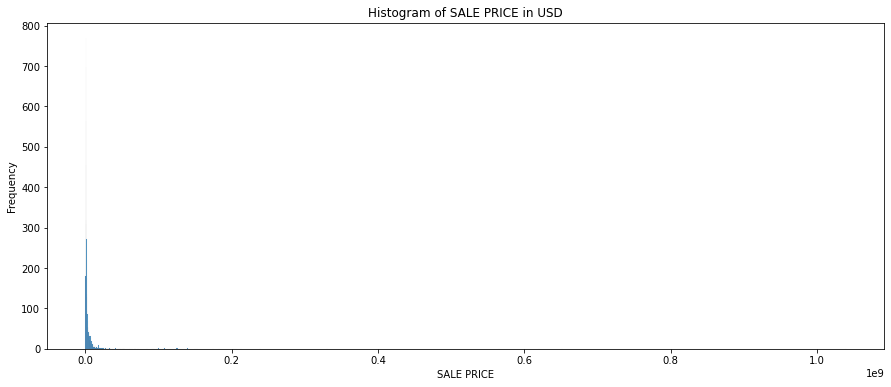

In [75]:
plt.figure(figsize=(15,6))

# Histogram plot of SALE PRICE
sns.histplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

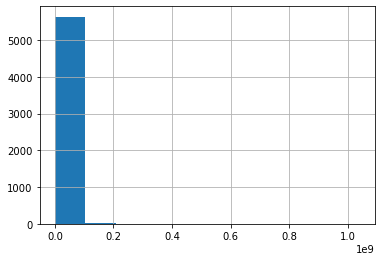

In [76]:
# Histogram of SALE PRICE
df['SALE PRICE'].hist()

From the above histograms, we can infer that most of the properties have very low price of the order of 0. , which is also wrong. This according to the dataset means the property was transferred but its not actually a sale. 

From the describe statistics we can infer that 75% of the properties in this dataset are cheaper than 950,000 USD. Also there is a fair share of properties below 100000 USD which is way too cheap for an expensive city like Manhattan.

Hence let's cap the property price between 100,000 USD and 5,000,000 USD in this case.

In [77]:
# Remove observations that fall outside those caps
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]
len(df)

4724

After treating the outliers, the distribution of the data has become more representative

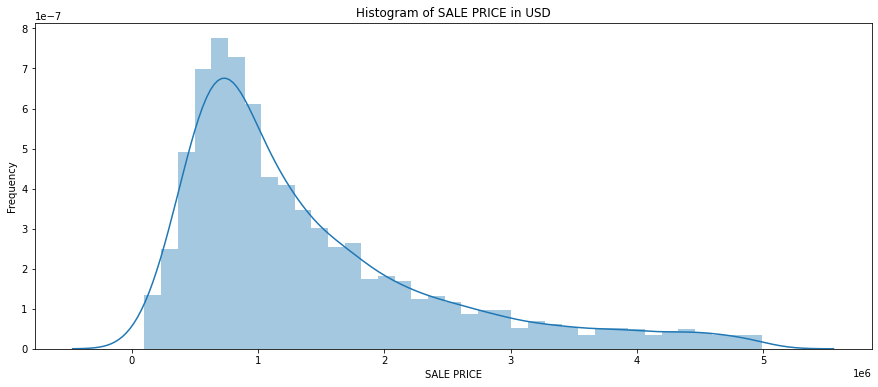

In [78]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Frequency')
plt.show()

In [79]:
df['LAND SQUARE FEET'].unique()

array([ 2272.,  1750.,    nan,  1520.,  1779.,  1218.,  1566.,  2000.,
        2469., 10053.,  4600.,  2271.,  5029.,   892.,  1360.,  1098.,
        4764.,  2510.,  1200.,  1275.,  2277.,  4937.,  6994., 27600.,
       11553.,   987.,  1407.,  2270.,   384.,   925.,   943.,  2171.,
       15845.,  1549.,  1665.,  1699.,  1488.,  1431.,  1900.,  2220.,
        2498.,  1686.,  1231.,  1615.,  1817.,  2377.,  1799.,  1749.,
        1599.,  1598.,  1472.,  1499.,   756.,  1343.,  3033.,  1998.,
        1873.,  2495.,  1824.,  1682.,  1249.,  1271.,  2018.,  2629.,
        1444.,  1700.,  1848.,  3797.,  2523.,  2153.,  1413.,  1716.,
        1917.,  1500.,  1557.,   900.,  2765.,  1815.,  1608.,  1680.,
        1667.,  2546.,  1394.,  2400.,  2100.,  1913.,  2500.,  2492.,
       15009.,  2598.,  3088.,  1856.,  5973.,  2288.,  2525.,  1162.,
        1345.,  2212.,  1968., 10294.,  1875.,  8074.,  2851.,  1083.,
        1422.,  1766.,  5046.,  7064.,  2075.,  5752.,  1892.,  1850.,
      

In [80]:
# Replace nulls in land square feet with its mean
df['LAND SQUARE FEET'].replace(np.nan, df['LAND SQUARE FEET'].mean(), inplace=True)

In [81]:
df['GROSS SQUARE FEET'].unique()

array([6.79400e+03, 4.22600e+03,         nan, 3.36000e+03, 3.71300e+03,
       3.58600e+03, 6.33000e+03, 4.10000e+03, 1.98920e+04, 7.88820e+04,
       1.22000e+04, 5.26000e+03, 2.12740e+04, 1.78400e+03, 3.27400e+03,
       2.71200e+03, 2.07000e+04, 8.17500e+03, 3.36000e+02, 2.64000e+03,
       5.79400e+03, 5.54730e+04, 7.94650e+04, 5.66858e+05, 3.06800e+04,
       2.17991e+05, 3.78000e+03, 3.08000e+03, 1.32300e+04, 1.15200e+03,
       2.33700e+03, 2.68400e+03, 3.52400e+03, 3.03600e+03, 3.20000e+03,
       3.62000e+03, 3.53600e+03, 3.95100e+03, 3.59100e+03, 3.37100e+03,
       4.12200e+03, 5.13800e+03, 3.00000e+03, 3.41600e+03, 3.24000e+03,
       3.32800e+03, 5.00400e+03, 4.00200e+03, 3.60000e+03, 3.46000e+03,
       2.62500e+03, 3.84000e+03, 2.34000e+03, 4.00000e+03, 3.40000e+03,
       4.32000e+03, 8.10000e+03, 3.05400e+03, 3.04600e+03, 2.85200e+03,
       2.64600e+03, 3.33500e+03, 3.33200e+03, 3.32000e+03, 2.70000e+03,
       4.60300e+03, 2.05800e+03, 5.16700e+03, 2.99400e+03, 8.500

In [82]:
# Replace nulls in gross square feet with its mean
df['GROSS SQUARE FEET'].replace(np.nan, df['GROSS SQUARE FEET'].mean(), inplace=True)

In [83]:
# Remove data where commercial + residential doesn't equal total units since there is some mis-match in the dataset
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [84]:
df = df[df['YEAR BUILT'] > 0]

In [85]:
# Sale year oof 2017 is taken as the reference year
df['BUILDING AGE'] = 2017 - df['YEAR BUILT']

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 3 to 7270
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    4179 non-null   object        
 1   BUILDING CLASS CATEGORY         4179 non-null   object        
 2   TAX CLASS AT PRESENT            4179 non-null   object        
 3   BLOCK                           4179 non-null   int64         
 4   LOT                             4179 non-null   int64         
 5   BUILDING CLASS AT PRESENT       4179 non-null   object        
 6   ADDRESS                         4179 non-null   object        
 7   APARTMENT NUMBER                4179 non-null   object        
 8   ZIP CODE                        4179 non-null   int64         
 9   RESIDENTIAL UNITS               4179 non-null   int64         
 10  COMMERCIAL UNITS                4179 non-null   int64         
 11  TOTA

In [87]:
#Choose only the variables I want to use in the model
columns = ['BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET', 'SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
df_model = df.loc[:,columns]

In [88]:
df['BUILDING CLASS CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS                1835
10 COOPS - ELEVATOR APARTMENTS                 1364
09 COOPS - WALKUP APARTMENTS                    368
17 CONDO COOPS                                  249
07 RENTALS - WALKUP APARTMENTS                  119
15 CONDOS - 2-10 UNIT RESIDENTIAL                65
12 CONDOS - WALKUP APARTMENTS                    41
02 TWO FAMILY DWELLINGS                          38
01 ONE FAMILY DWELLINGS                          20
03 THREE FAMILY DWELLINGS                        20
22 STORE BUILDINGS                               13
37 RELIGIOUS FACILITIES                           7
14 RENTALS - 4-10 UNIT                            7
08 RENTALS - ELEVATOR APARTMENTS                  5
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT        5
04 TAX CLASS 1 CONDOS                             5
21 OFFICE BUILDINGS                               4
23 LOFT BUILDINGS                                 4
29 COMMERCIAL GARAGES                             3
26 OTHER HOT

In [89]:
# Create one-hot vector since its a non-ordinal categorical column
cols = pd.get_dummies(df_model['BUILDING CLASS CATEGORY'], prefix= 'BUILDING CLASS CATEGORY')
df_model[cols.columns] = cols
df_model.drop('BUILDING CLASS CATEGORY', axis = 1, inplace = True)

In [90]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 3 to 7270
Data columns (total 30 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   COMMERCIAL UNITS                                                     4179 non-null   int64  
 1   GROSS SQUARE FEET                                                    4179 non-null   float64
 2   SALE PRICE                                                           4179 non-null   float64
 3   BUILDING AGE                                                         4179 non-null   int64  
 4   LAND SQUARE FEET                                                     4179 non-null   float64
 5   RESIDENTIAL UNITS                                                    4179 non-null   int64  
 6   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                      4179 non-null   uint8  
 7   BUILDI

In [91]:
df_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,...,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
3,0,6794.00000,3936272.0,104,2272.000000,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,4226.00000,3192840.0,97,1750.000000,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,9630.57085,499000.0,97,2686.862595,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,9630.57085,529500.0,97,2686.862595,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,9630.57085,423000.0,97,2686.862595,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Add 1 to Units
df_model['COMMERCIAL UNITS'] = df_model['COMMERCIAL UNITS'] + 1
df_model['RESIDENTIAL UNITS'] = df_model['RESIDENTIAL UNITS'] + 1
# Take the log and standardise
df_model['COMMERCIAL UNITS'] = np.log(df_model['COMMERCIAL UNITS'])
df_model['RESIDENTIAL UNITS'] = np.log(df_model['RESIDENTIAL UNITS'])

In [93]:
# Take the log and normalise
df_model['SALE PRICE'] = np.log(df_model['SALE PRICE'])

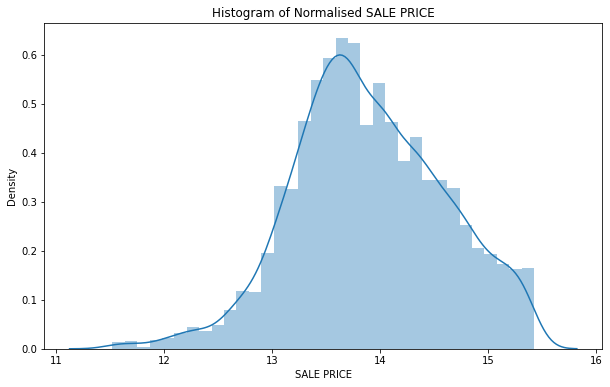

In [94]:
plt.figure(figsize=(10,6))
sns.distplot(df_model['SALE PRICE'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

<div class="alert alert-block alert-info">
    <b>SCALING JUSTIFICATION:</b>
    
I have chosen <b>Standard Scaler</b> as the scaling criterion to standardize the input variables since the sale price target column more or less follows a normal distribution as seen above. Standard Scaler is chosen since it maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling</div>

## Model Selection and Hyperparameter tuning

In [95]:
# Regression
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [101]:
X = df_model.drop('SALE PRICE', axis = 1)
y = df_model['SALE PRICE']

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Recommended changes - Kernelized SVR ran individually
#### Kernel Linear

In [103]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['linear'], 'max_iter':[100, 200, 300, 400, 500]}

In [104]:
grid_reg = GridSearchCV(SVR(), param_grid, cv = 5, n_jobs=-1, scoring="r2", return_train_score=True)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['linear'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [105]:
y_pred = grid_reg.predict(X_test)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test, y_test)))

Best parameters: {'C': 0.01, 'epsilon': 1.0, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 300}
Best cross-validation score: 0.1583
Train score: 0.1806
Test score: -0.0261


#### Kernel rbf

In [106]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['rbf'], 'max_iter':[100, 200, 300, 400, 500]}

In [107]:
grid_reg = GridSearchCV(SVR(), param_grid, cv = 5, n_jobs=-1, scoring="r2", return_train_score=True)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['rbf'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [108]:
y_pred = grid_reg.predict(X_test)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test, y_test)))

Best parameters: {'C': 1.0, 'epsilon': 1.0, 'gamma': 100.0, 'kernel': 'rbf', 'max_iter': 500}
Best cross-validation score: 0.1905
Train score: 0.2411
Test score: 0.1825


#### Kernel poly

In [109]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'degree':[2, 3, 4] , 'kernel':['poly'], 'max_iter':[100, 200, 300, 400, 500]}

In [110]:
grid_reg = GridSearchCV( SVR(), param_grid, cv = 5, n_jobs = -1, scoring="r2", return_train_score = True )
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['poly'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [111]:
y_pred = grid_reg.predict(X_test)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test, y_test)))

Best parameters: {'C': 10.0, 'degree': 2, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 300}
Best cross-validation score: 0.1673
Train score: -0.1044
Test score: -7.8824


## 1. Bagging Regressor with Bagging

In [52]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

param_grid = {'n_estimators':[10, 20, 30, 40, 50], 
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}

bag_reg = BaggingRegressor(RandomForestRegressor(criterion='mse', max_depth=5, max_leaf_nodes=10, random_state=0), bootstrap=True, random_state=0)
bag_grid = GridSearchCV(bag_reg, param_grid = param_grid, scoring='r2', n_jobs=-1, cv = 5)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             random_state=0),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [53]:
y_pred = bag_grid.predict(X_test)
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(bag_grid.best_score_))
print("Train score: {:.4f}".format(bag_grid.score(X_train, y_train)))
print("Test score: {:.4f}".format(bag_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
Best cross-validation score: 0.23868
Train score: 0.2544
Test score: 0.2379
R2 score: 0.2379


In [71]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

param_grid = {'n_estimators':[10, 20, 30, 35, 50, 51, 52, 53, 54, 55, 60],
              'max_samples':[0.01, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 1], 
              'max_features':[0.01, 0.05, 0.06, 0.08, 0.1, 0.5, 1]}

bag_reg = BaggingRegressor(LinearRegression(fit_intercept=True, normalize= False, positive= True), bootstrap=True, random_state=0)
bag_grid = GridSearchCV(bag_reg, param_grid = param_grid, scoring='r2', cv = 5, n_jobs=-1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(positive=True),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.01, 0.05, 0.06, 0.08, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6,
                                         0.7, 1],
                         'n_estimators': [10, 20, 30, 35, 50, 51, 52, 53, 54,
                                          55, 60]})

In [72]:
y_pred = bag_grid.predict(X_test)
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(bag_grid.best_score_))
print("Train score: {:.4f}".format(bag_grid.score(X_train, y_train)))
print("Test score: {:.4f}".format(bag_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'max_features': 0.08, 'max_samples': 0.5, 'n_estimators': 54}
Best cross-validation score: 0.04056
Train score: -31.6681
Test score: 0.0419
R2 score: 0.0419


## 2. Bagging Regressor with Pasting

In [73]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

param_grid = {'n_estimators':[10, 20, 30, 40, 50], 
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}

bag_reg = BaggingRegressor(RandomForestRegressor(criterion='mse', max_depth=5, max_leaf_nodes=10, random_state=0), bootstrap=False, random_state=0)
bag_grid = GridSearchCV(bag_reg, param_grid = param_grid, scoring='r2', n_jobs=-1, cv = 5)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             random_state=0),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [74]:
y_pred = bag_grid.predict(X_test)
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(bag_grid.best_score_))
print("Train score: {:.4f}".format(bag_grid.score(X_train, y_train)))
print("Test score: {:.4f}".format(bag_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
Best cross-validation score: 0.23889
Train score: 0.2578
Test score: 0.2414
R2 score: 0.2414


In [77]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

param_grid = {'n_estimators':[10, 20, 30, 35, 50, 51, 52, 53, 54, 55, 60],
              'max_samples':[0.01, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 1], 
              'max_features':[0.01, 0.05, 0.06, 0.08, 0.1, 0.5, 1]}

bag_reg = BaggingRegressor(LinearRegression(fit_intercept=True, normalize=False, positive=True), bootstrap=False, random_state=0)
bag_grid = GridSearchCV(bag_reg, param_grid = param_grid, scoring='r2', cv = 5, n_jobs=-1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=LinearRegression(positive=True),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.01, 0.05, 0.06, 0.08, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6,
                                         0.7, 1],
                         'n_estimators': [10, 20, 30, 35, 50, 51, 52, 53, 54,
                                          55, 60]})

In [79]:
y_pred = bag_grid.predict(X_test)
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(bag_grid.best_score_))
print("Test score: {:.4f}".format(bag_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
Best cross-validation score: 0.14952
Test score: 0.1574
R2 score: 0.1574


## 3. AdaBoosting

In [81]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'learning_rate':[0.1, 0.5, 1],
              'n_estimators':[10, 20, 30, 40, 50]}

ada_reg = AdaBoostRegressor(base_estimator = RandomForestRegressor(criterion='mse', max_depth=5, max_leaf_nodes=10, random_state=0))
ada_grid = GridSearchCV(ada_reg, param_grid = param_grid, scoring='r2', cv = 5, n_jobs=-1)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                                              max_leaf_nodes=10,
                                                                              random_state=0)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [82]:
y_pred = ada_grid.predict(X_test)
print("Best parameters: {}".format(ada_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(ada_grid.best_score_))
print("Test score: {:.4f}".format(ada_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 20}
Best cross-validation score: 0.25256
Test score: 0.2567
R2 score: 0.2567


In [95]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'learning_rate':[0.1, 0.5, 1],
              'n_estimators':[10, 20, 30, 40, 50]}

ada_reg = AdaBoostRegressor(base_estimator = LinearRegression(fit_intercept=True, normalize=False, positive=True))

ada_grid = GridSearchCV(ada_reg, param_grid = param_grid, scoring='r2', cv = 5, n_jobs = -1)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(positive=True)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [96]:
y_pred = ada_grid.predict(X_test)
print("Best parameters: {}".format(ada_grid.best_params_))
print("Best cross-validation score: {:.5f}".format(ada_grid.best_score_))
print("Test score: {:.4f}".format(ada_grid.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'learning_rate': 1, 'n_estimators': 10}
Best cross-validation score: -123.89568
Test score: -150566634956312477696.0000
R2 score: -150566634956312477696.0000


## 4. Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'max_depth':[1, 3, 5, 7, 8, 9, 11, 13, 15],
              'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 1],
              'n_estimators':[10, 20, 30, 40, 50, 60, 65, 68, 70]}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=0), scoring='r2', param_grid, cv = 5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1],
                         'max_depth': [1, 3, 5, 7, 8, 9, 11, 13, 15],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 65, 68, 70]})

In [93]:
y_pred = grid_gb.predict(X_test)
print("Best parameters: {}".format(grid_gb.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_gb.best_score_))
print("Train score: {:.4f}".format(grid_gb.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_gb.score(X_test, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 65}
Best cross-validation score: 0.3233
Train score: 0.4459
Test score: 0.2853
R2 score: 0.2853


## 6. PCA

In [122]:
X_train.shape

(3343, 29)

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [124]:
# Features post dimensionality reduction
pca.n_components_

22

## 6.1. Linear Regression

In [92]:
param_grid = {'fit_intercept':[True, False], 'normalize':[True, False], 'positive':[True, False]}

In [93]:
grid_reg = GridSearchCV(LinearRegression(), param_grid, cv = 5, n_jobs=-1, scoring="r2", return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             return_train_score=True, scoring='r2')

In [95]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'fit_intercept': True, 'normalize': True, 'positive': True}
Best cross-validation score: -0.4323
Train score: 0.0605
Test score: 0.0268


## 6.2. KNN

In [103]:
param_grid = {"n_neighbors": np.arange(3,15), 'weights': ['uniform', 'distance'], 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric' : ['euclidean', 'manhattan' , 'minkowski']}

In [104]:
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2')

In [105]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best cross-validation score: 0.3180
Train score: 0.4593
Test score: 0.2795


## 6.3. Ridge Regression

In [106]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0] , "fit_intercept": [True, False], "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 'max_iter':[100, 200, 300]}

In [107]:
grid_reg = GridSearchCV(Ridge(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             return_train_score=True, scoring='r2')

In [108]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

Best parameters: {'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'solver': 'saga'}
Best cross-validation score: 0.1460
Train score: 0.2026
Test score: -0.0030
R2 score: -0.0030


## 6.4. Lasso Regression

In [109]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0] , 'fit_intercept': [True, False], 'normalize': [True, False], 'max_iter' : [100, 200, 300], 'selection' :['cyclic', 'random'] }

In [110]:
grid_reg = GridSearchCV(Lasso(random_state=0), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300],
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random']},
             return_train_score=True, scoring='r2')

In [111]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'selection': 'cyclic'}
Best cross-validation score: 0.1908
Train score: 0.1995
Test score: 0.0296


## 6.5. Polynomial Regression

In [114]:
param_poly = {'polynomialfeatures__degree' : range(1, 6)  }
poly = PolynomialFeatures()
lr = LinearRegression()
poly_cv = make_pipeline(PolynomialFeatures() , LinearRegression())
grid_reg = GridSearchCV( poly_cv,  param_poly, cv = 5, n_jobs = -1, scoring="r2", return_train_score=True)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': range(1, 6)},
             return_train_score=True, scoring='r2')

In [115]:
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test, y_test)))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: -4119436994834774651568128.0000
Train score: 0.2517
Test score: -10912315540812191489851392.0000


### 6.6. LinearSVR

In [116]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'max_iter' : [100, 200, 300, 400, 500]}

In [117]:
grid_reg = GridSearchCV(LinearSVR(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [118]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'C': 0.1, 'epsilon': 1.0, 'max_iter': 500}
Best cross-validation score: 0.1344
Train score: 0.1733
Test score: 0.1348


### 6.7. Kernalized Support Vector Machine (rbf, poly, linear)

### 6.7.1. SVR Kernal linear

In [119]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['linear'], 'max_iter':[100, 200, 300, 400, 500]}

In [120]:
grid_reg = GridSearchCV(SVR(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['linear'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [121]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'C': 0.01, 'epsilon': 1.0, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 300}
Best cross-validation score: 0.1655
Train score: 0.1798
Test score: 0.0643


### 6.7.2. SVR Kernal rbf

In [122]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['rbf'], 'max_iter':[100, 200, 300, 400, 500]}

In [123]:
grid_reg = GridSearchCV(SVR(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['rbf'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [124]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'C': 10.0, 'epsilon': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 400}
Best cross-validation score: 0.1849
Train score: 0.2018
Test score: 0.1994


### 6.7.3. SVR Kernal poly

In [125]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'epsilon':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'degree':[2, 3, 4] , 'kernel':['poly'], 'max_iter':[100, 200, 300, 400, 500]}

In [126]:
grid_reg = GridSearchCV(SVR(), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['poly'],
                         'max_iter': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [127]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'C': 10.0, 'degree': 2, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 300}
Best cross-validation score: 0.1468
Train score: -1.2696
Test score: -11.3663


### 6.8. Decision Tree Regression

In [137]:
param_grid = {"criterion": ['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'], 'max_depth': np.arange(2,10), 'max_leaf_nodes' : np.arange(2,10), 'max_features': ['auto', 'sqrt', 'log2'] }

In [138]:
grid_reg = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='r2')

In [139]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 9}
Best cross-validation score: 0.2506
Train score: 0.2728
Test score: 0.2550


### 6.9. Random Forest Regression

In [140]:
param_grid = {'criterion': ['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'], 'max_depth': np.arange(2,10), 'max_leaf_nodes': np.arange(2,10)}
#'n_estimators':[10, 50], , 'bootstrap': [True, False]

In [141]:
grid_reg = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv = 5, n_jobs = -1, scoring = 'r2', return_train_score=True)
grid_reg.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='r2')

In [142]:
y_pred = grid_reg.predict(X_test_pca)
print("Best parameters: {}".format(grid_reg.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_reg.best_score_))
print("Train score: {:.4f}".format(grid_reg.score(X_train_pca, y_train)))
print("Test score: {:.4f}".format(grid_reg.score(X_test_pca, y_test)))

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'max_leaf_nodes': 9}
Best cross-validation score: 0.2649
Train score: 0.2862
Test score: 0.2647


<div>
<img src="RegnScoreSheet.png" width="1500"/>
</div>

<div class="alert alert-block alert-info">
For this regression dataset, PCA produces better results in comparison with pre-PCA results. In specific, comparitively high performing models for this dataset are RandomForestRegression and its predecessor DecisionTreeClassifier which shows a slight increase in scores after dimensionality reduction. Better results with PCA may be attributed to the fact that the error squares are minimized perpendicular to the straight line as its a linear technique.
</div>

## 7. Deep Learning Models

In [112]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [113]:
model = Sequential()
model.add(Dense(16, input_dim = 29, activation='relu', kernel_initializer = 'normal', name = 'input_layer'))
model.add(Dense(1, activation = 'softmax', name = 'output_layer'))

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 16)                480       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam', 
              metrics=['mae','mse'])

In [116]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
335/335 [==============================] - 1s 2ms/step - loss: 166.8182 - mae: 12.8967 - mse: 166.8182
Epoch 2/10
335/335 [==============================] - 1s 2ms/step - loss: 166.8183 - mae: 12.8967 - mse: 166.8183
Epoch 3/10
335/335 [==============================] - 1s 2ms/step - loss: 166.8183 - mae: 12.8967 - mse: 166.8183
Epoch 4/10
335/335 [==============================] - 1s 2ms/step - loss: 166.8182 - mae: 12.8967 - mse: 166.8182
Epoch 5/10
335/335 [==============================] - 0s 1ms/step - loss: 166.8182 - mae: 12.8967 - mse: 166.8182
Epoch 6/10
335/335 [==============================] - 0s 1ms/step - loss: 166.8183 - mae: 12.8967 - mse: 166.8183
Epoch 7/10
335/335 [==============================] - 0s 1ms/step - loss: 166.8183 - mae: 12.8967 - mse: 166.8183
Epoch 8/10
335/335 [==============================] - 0s 1ms/step - loss: 166.8183 - mae: 12.8967 - mse: 166.8183
Epoch 9/10
335/335 [==============================] - 1s 2ms/step - loss: 166.8182 - mae

In [118]:
# Step 4: Model evaluation
loss_and_metrics = model.evaluate(X_test, y_test)

print(loss_and_metrics)

print("Test Loss", loss_and_metrics[0])
print("Test mae", loss_and_metrics[1])
print("Test mse", loss_and_metrics[2])

27/27 [==============================] - 0s 960us/step - loss: 166.5877 - mae: 12.8878 - mse: 166.5877
[166.58773803710938, 12.887773513793945, 166.58773803710938]
Test Loss 166.58773803710938
Test mae 12.887773513793945
Test mse 166.58773803710938


## Model selection

<div class="alert alert-block alert-info">
By running Grid Search for different models and by playing around corresponding hyper-parameters, we come to a conclusion that Random Forest Regression model seems to perform better not the best in this case, with a Train score: 0.2728, Test score: 0.255 post dimensionality reduction wherein the best hyper-parameters chosen are criterion of {'criterion': 'friedman_mse', 'max_depth': 6, 'max_leaf_nodes': 9}. With this lets predict the target values for the test dataset.
</div>

## Final Prediction

In [125]:
# By applying the best hyperparameters found by using Grid Search, lets train the chosen model to predict the SALE Price (as of 2017) for test dataset
model=RandomForestRegressor(criterion='friedman_mse', max_depth=6, max_leaf_nodes=9)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print('Random Forest Regression:')
print ('R-Squared Test Score is {:.4f}'.format(r2))
print('Predictions for the test dataset is :\n', y_pred)

Random Forest Regression:
R-Squared Test Score is 0.2569
Predictions for the test dataset is :
 [14.56760441 13.94581075 13.64395775 13.93633633 13.63931961 13.95812475
 13.30337818 14.45409489 14.56760441 13.63650249 14.27319995 13.30337818
 13.93361948 13.52351688 14.28594796 14.28594796 13.64395775 13.80947046
 13.93361948 14.28594796 13.63650249 14.28594796 13.94581075 13.94581075
 13.95812475 13.93361948 13.63650249 14.39718983 13.80947046 13.93361948
 13.30337818 13.30337818 13.63650249 14.01152798 13.63931961 13.93361948
 14.56760441 13.63650249 14.28594796 13.63650249 13.94581075 13.63650249
 13.63650249 13.63931961 14.56760441 13.93361948 13.64395775 13.30337818
 14.32623003 13.63650249 13.63650249 14.2647537  13.30337818 14.01152798
 13.30337818 13.64633735 13.64395775 13.80947046 13.95812475 14.35366811
 13.94581075 13.63650249 14.56060535 13.64395775 13.63650249 13.93633633
 14.35366811 13.63650249 13.30337818 13.93361948 14.35366811 13.81780718
 13.63931961 13.93361948 13.

<div class="alert alert-block alert-success">
For this dataset, of all the models considered Random Forest Regression model helps predict the sale price for the test dataset  post dimensionality reduction with a r-squared score of 0.2569.
</div>